# Connor Hamilton

# MILESTONE 2

In [12]:
import pandas as pd

dataset = pd.read_csv("..\\data\\raw\\ks-projects-201801.csv")

print(dataset.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

# MILESTONE 3
## TASK 2: DATA ANALYSIS PIPELINE

Data pipe line is done first to clean up the data frame to make EDA easier.

Imports first

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Loads the dataframe first.

Next I drop any rows that have a state of undefined as they don't help the analysis.

Then I drop any rows where the country is set as N,0". I'm think this means they have no country data so they only mess up analysis on country data.

Finally I chose to drop the columns "usd pledged", "pledged" and "goal". The data set already has these columns but with real attached to these names. 

There isn't too many rows where they are different so I chose to go with the "real" columns as I believe they are more accurate.

In [14]:
df = pd.read_csv("..\\data\\raw\\ks-projects-201801.csv")
df = df[df["state"] != "undefined"]
df = df[df["country"] != 'N,0"']
df = df.drop(["usd pledged", "pledged", "goal"], axis=1)

Print out a quick check of the dataframe so we can see that the columns all look good.

I didn't choose to rename any columns as they are all labeled good enough to work with.

There is also no rows with NaN values so no value cleaning is needed there.


In [15]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


## TASK 1: EDA

First I load a couple functions to help print out some useful data.

In [16]:
columns = []
for i in df.columns:
    columns.append(i)

def ListOfUniqueValues(column):
    return  list(df[column].unique())

def NumOfCountry(countrycode):
    country = list(np.where(df["country"] == countrycode))
    country = pd.DataFrame(country).T
    country.rename(columns = {0:"Index"}, inplace=True)
    numcountry = int(country.count())
    print("Num of Index's with country code " + countrycode + ": " + str(numcountry))

def Percent(column, value):
    lst = pd.DataFrame(list(np.where(df[column] == value))).T
    p = (lst.count() / df[column].count() * 100)
    print("%0.3f" % p + "%")

def PercentPerColumnValue(columnselect, valueselect, column, value, printyorn = True):
    df2 = df[df[columnselect] == valueselect]
    lst = pd.DataFrame(list(np.where(df2[column] == value))).T
    p = (lst.count() / df2[column].count() * 100)
    if(printyorn):
        print("Country: " + valueselect + " had %0.3f" % p + "%" + " of campaigns have a state of " + value)
    return float(p)

Then I run some print statments to get some data.

In [17]:
print("Columns:")
print(columns)
print()
print("Main Categories: ")
print(ListOfUniqueValues("main_category"))
print()
print("Countries:")
print(ListOfUniqueValues("country"))
print()
print("Currencies:")
print(ListOfUniqueValues("currency"))
print()
print("Num of Each Country:")
for i in ListOfUniqueValues("country"):
    NumOfCountry(i)
print()
print("Num of Categories:")
print(len(ListOfUniqueValues("category")))
print()
print("Average USD Pledged:")
print("$%0.2f" % (df["usd_pledged_real"].sum() / df["usd_pledged_real"].count()))
print()
print("Median USD Pledged:")
print("$%0.2f" % df["usd_pledged_real"].median())
print()
print("Average Goal (USD):")
print("$%0.2f" % (df["usd_goal_real"].sum() / df["usd_goal_real"].count()))
print()
print("Median Goal (USD):")
print("$%0.2f" % df["usd_goal_real"].median())
print()

print("Percent Succesful:")
Percent("state", "successful")
print()
print("Percent Failed:")
Percent("state", "failed")
print()
print("Percent Canceled:")
Percent("state", "canceled")

for i in ListOfUniqueValues("country"):
    PercentPerColumnValue("country", i, "state", "successful", True)
    PercentPerColumnValue("country", i, "state", "failed", True)
    PercentPerColumnValue("country", i, "state", "canceled", True)
    print()


Columns:
['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real']

Main Categories: 
['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts', 'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography', 'Technology', 'Dance', 'Journalism']

Countries:
['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG', 'JP']

Currencies:
['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD', 'CHF', 'DKK', 'HKD', 'SGD', 'JPY']

Num of Each Country:
Num of Index's with country code GB: 33672
Num of Index's with country code US: 292627
Num of Index's with country code CA: 14756
Num of Index's with country code AU: 7839
Num of Index's with country code NO: 708
Num of Index's with country code IT: 2878
Num of Index's with country code DE: 4171
Num of Index's with country code IE: 811
Num of Index's with country code MX: 17

Then we can run some plots to viualize the data.

Set the theme first.

In [18]:
sns.set_theme(style="ticks", font_scale=0.8)

The first plot we run shows the median pledged per country.

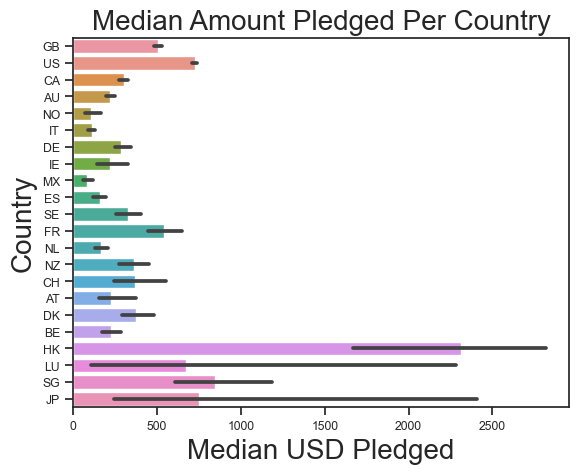

In [19]:
f1 = plt.figure(1)
sns.barplot(data=df, y="country", x="usd_pledged_real", estimator=np.median)
plt.ylabel("Country", size=20)
plt.xlabel("Median USD Pledged", size=20)
plt.title("Median Amount Pledged Per Country", size=20)
f1.savefig("..\\images\\PlegedPerCountry.png")

Then we run the plot that shows the median pledged per country.

We can then compare countries median pledgeds to the most popular countries.

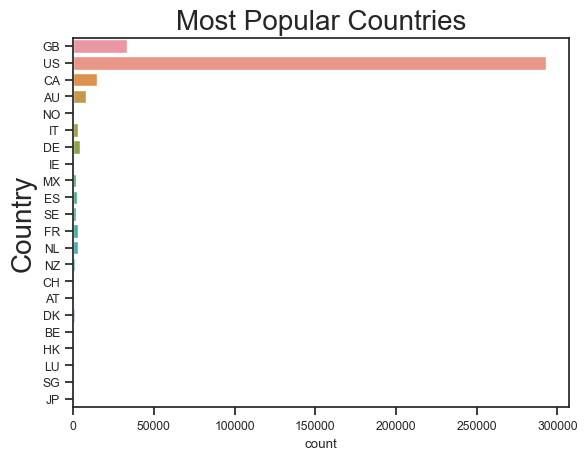

In [26]:
f4 = plt.figure(4)
sns.countplot(data=df, y="country")
plt.ylabel("Country", size=20)
plt.title("Most Popular Countries", size=20)
plt.savefig("..\\images\\PopularCountry.png")

Looks like the US is very popular, lets remove it from the graph to see the other countries.

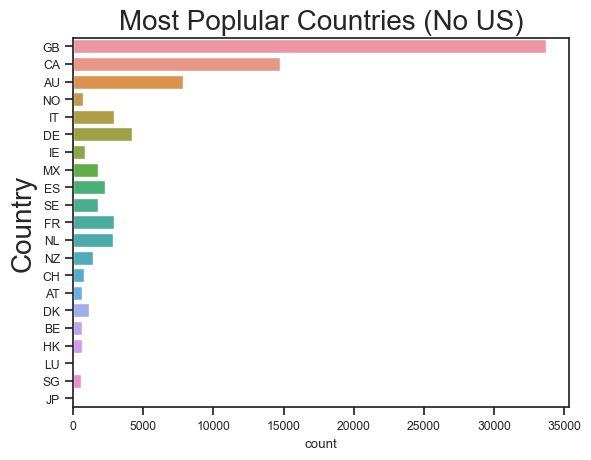

In [27]:
dftemp = df[df["country"] != "US"]
f5 = plt.figure(5)
sns.countplot(data=dftemp, y="country")
plt.ylabel("Country", size=20)
plt.title("Most Poplular Countries (No US)", size=20)
plt.savefig("..\\images\\PopularCountryNoUS.png")

Now we can see that most countries have very low amounts of kickstarter campaigns.

This is interesting as we have seen that "small" countries like Hong Kong have a very large median pledged compared to other countries.

This is maybe because smaller countries feel more connected to campaigns from their country so they pledge more.

Next lets look at which categories got the most pledged.

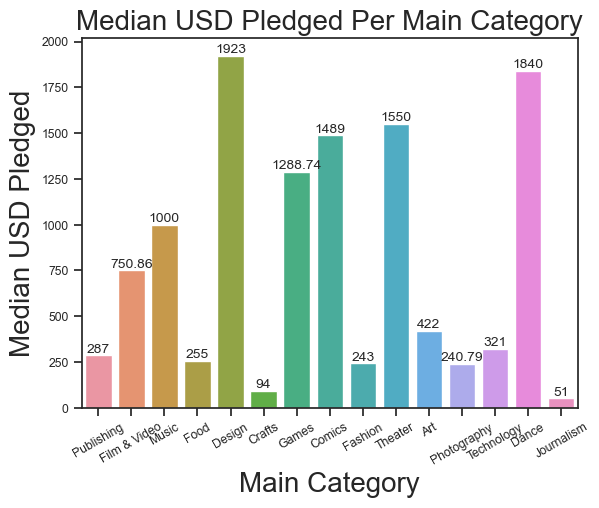

In [28]:
f2 = plt.figure(2)
ax = sns.barplot(data=df, x="main_category", y="usd_pledged_real", estimator=np.median, errorbar=None)
ax.bar_label(ax.containers[0], size=10)
plt.xlabel("Main Category", size=20)
plt.xticks(rotation=30)
plt.ylabel("Median USD Pledged", size=20)
plt.title("Median USD Pledged Per Main Category", size=20)
plt.savefig("..\\images\\PlegedPerCatergory.png")

We can see that dance and design had the largest median pledged.

Now lets see which categories had the most entires, as well as the state.

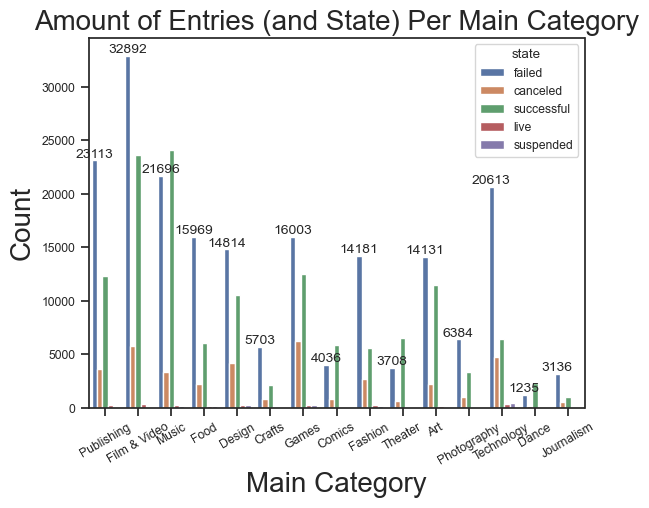

In [29]:
f3 = plt.figure(3)
ax = sns.countplot(data=df, x="main_category", hue="state")
ax.bar_label(ax.containers[0], size=10)
plt.xticks(rotation=30)
plt.xlabel("Main Category", size=20)
plt.ylabel("Count", size=20)
plt.title("Amount of Entries (and State) Per Main Category", size=20)
plt.savefig("..\\images\\EntriesStatePerCategory.png")

Here we can see that design and dance had quite a small amount of entires, with most being failed.

We can also see a corelation between a low median pledged and amount of failed campaigns in categories like film and video.

## TASK 3: METHOD CHAINING

In [30]:
def load_and_process(path):
    df = (pd.read_csv(path)
        .drop(["state"] != "undefined")
        .drop(["country"] != 'N,0"')
        .drop(["usd pledged", "pledged", "goal"], axis=1)
    )
    return df

Here we move all our data analysis pipeline into a function so it is cleaner.

In [31]:
import project_functions1 as p1

df = p1.load_and_process("../data/raw/ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


Moved the loading and processing to a .py file

## TASK 4

Most analysis was done in my EDA.

An interesting point is that smaller countries had the highest median pledged depsite them having a smaller amount of campaigns. Perhaps this is because smaller because the smaller amount of people donating to campaigns in those countries felt more connected to them. Another possibilty is that smaller countries produce better campaigns because kickstarter is less popular there so only groups with outstanding ideas produce campaigns.

This trend continues with categories with less campaigns having higher median amounts pledged.

A lot more analysis could be done with the data I got from doing simple prints of information.

Some interesting points from printed data:

Percent Succesful: 
35.707%

Percent Failed: 
52.716%

Percent Canceled: 
10.339%

Compared to the success/failed/canceled rates per country:

Country: GB had 35.837% of campaigns have a state of successful

Country: GB had 51.636% of campaigns have a state of failed

Country: GB had 11.170% of campaigns have a state of canceled


Country: US had 37.351% of campaigns have a state of successful

Country: US had 51.964% of campaigns have a state of failed

Country: US had 9.675% of campaigns have a state of canceled


Country: CA had 28.016% of campaigns have a state of successful

Country: CA had 55.815% of campaigns have a state of failed

Country: CA had 14.489% of campaigns have a state of canceled


Country: AU had 25.641% of campaigns have a state of successful

Country: AU had 58.757% of campaigns have a state of failed

Country: AU had 13.586% of campaigns have a state of canceled


Country: NO had 22.881% of campaigns have a state of successful

Country: NO had 59.322% of campaigns have a state of failed

Country: NO had 15.819% of campaigns have a state of canceled


Country: IT had 15.254% of campaigns have a state of successful

Country: IT had 67.060% of campaigns have a state of failed

Country: IT had 14.107% of campaigns have a state of canceled


Country: DE had 22.465% of campaigns have a state of successful

Country: DE had 59.914% of campaigns have a state of failed

Country: DE had 14.889% of campaigns have a state of canceled


Country: IE had 25.524% of campaigns have a state of successful

Country: IE had 58.693% of campaigns have a state of failed

Country: IE had 13.564% of campaigns have a state of canceled


Country: MX had 22.603% of campaigns have a state of successful

Country: MX had 57.934% of campaigns have a state of failed

Country: MX had 12.614% of campaigns have a state of canceled


Country: ES had 21.617% of campaigns have a state of successful

Country: ES had 60.677% of campaigns have a state of failed

Country: ES had 14.543% of campaigns have a state of canceled


Country: SE had 28.970% of campaigns have a state of successful

Country: SE had 56.915% of campaigns have a state of failed

Country: SE had 11.895% of campaigns have a state of canceled


Country: FR had 30.895% of campaigns have a state of successful

Country: FR had 54.849% of campaigns have a state of failed

Country: FR had 12.011% of campaigns have a state of canceled


Country: NL had 21.513% of campaigns have a state of successful

Country: NL had 62.552% of campaigns have a state of failed

Country: NL had 13.808% of campaigns have a state of canceled


Country: NZ had 30.961% of campaigns have a state of successful

Country: NZ had 57.084% of campaigns have a state of failed

Country: NZ had 10.435% of campaigns have a state of canceled


Country: CH had 24.573% of campaigns have a state of successful

Country: CH had 61.104% of campaigns have a state of failed

Country: CH had 11.038% of campaigns have a state of canceled


Country: AT had 17.923% of campaigns have a state of successful

Country: AT had 63.317% of campaigns have a state of failed

Country: AT had 15.243% of campaigns have a state of canceled


Country: DK had 32.345% of campaigns have a state of successful

Country: DK had 50.854% of campaigns have a state of failed

Country: DK had 14.106% of campaigns have a state of canceled


Country: BE had 24.635% of campaigns have a state of successful

Country: BE had 60.130% of campaigns have a state of failed

Country: BE had 11.994% of campaigns have a state of canceled


Country: HK had 34.951% of campaigns have a state of successful

Country: HK had 42.233% of campaigns have a state of failed

Country: HK had 14.078% of campaigns have a state of canceled


Country: LU had 30.645% of campaigns have a state of successful

Country: LU had 61.290% of campaigns have a state of failed

Country: LU had 6.452% of campaigns have a state of canceled


Country: SG had 32.072% of campaigns have a state of successful

Country: SG had 49.730% of campaigns have a state of failed

Country: SG had 12.072% of campaigns have a state of canceled


Country: JP had 17.500% of campaigns have a state of successful

Country: JP had 40.000% of campaigns have a state of failed

Country: JP had 20.000% of campaigns have a state of canceled

We see that most bigger countries were close to the average success/failed/canceled percentage.

Well most smaller countries had a smaller percent of campaigns be successful.

## CONCLUSION

Lots of insight is gained by looking into this data.

The main insight I gained was that the amount of campaigns from a category/country negitivly impacted how successful they were.